# Logistic regression Titanic



# steps
1. Importing libraries
2. Importing dataset

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,r2_score

In [181]:
raw = pd.read_csv("./titanic.csv")
df = pd.DataFrame(raw)

In [182]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [183]:
df.shape

(891, 12)

In [184]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [186]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

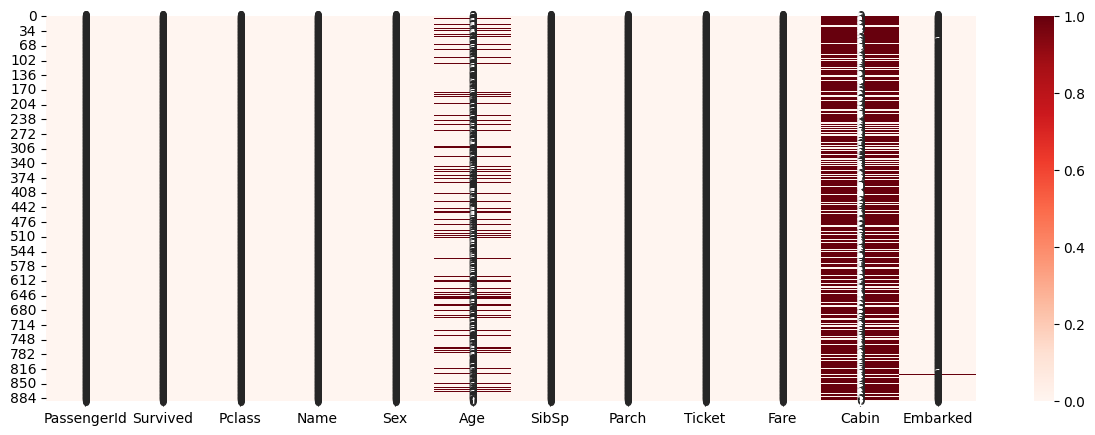

In [187]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),annot=True,cmap="Reds")

In [188]:
# Age % of null values
print(((df.Age.isnull().sum())/(len(df.Age)))*100)

19.865319865319865


In [189]:
# Cabin % of null vlaues
print(((df.Cabin.isnull().sum())/(len(df.Cabin)))*100)

77.10437710437711


In [190]:
print(((df.Embarked.isnull().sum())/(len(df.Embarked)))*100)

0.22446689113355783


In [191]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [192]:
# Drop Cabin feature
df.drop("Cabin",axis=1,inplace=True)

In [193]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [194]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [195]:
df.Embarked.unique()

# S = southampton
# Q = Queenstown
# C = Cherbourg

array(['S', 'C', 'Q', nan], dtype=object)

In [196]:
# show the datapoints where the embark is null
df[df.Embarked.isnull()]  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [197]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [198]:
# Show the Embarked values where the pclass=1
df.loc[df["Pclass"]==1,"Embarked"].value_counts()

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [199]:
# Show the Embarked values where the pclass=2
df.loc[df["Pclass"]==2,"Embarked"].value_counts()

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [200]:
# Show the Embarked values where the pclass=3
df.loc[df["Pclass"]==3,"Embarked"].value_counts()

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [201]:
# Show the Embarked values where the Fare=1
df.loc[df["Fare"]==80.0,"Embarked"].value_counts()

Series([], Name: Embarked, dtype: int64)

In [202]:
# Show the Embarked values where the Ticket=1
df.loc[df["Ticket"]==113572,"Embarked"].value_counts()

Series([], Name: Embarked, dtype: int64)

In [203]:
df.dropna(inplace=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [205]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [206]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [207]:
# sum of Age
df.Age.sum()

21205.17

In [208]:
# mean of Age
df.Age.mean()

29.69911764705882

In [209]:
# mode of Age
df.Age.mode()

0    24.0
Name: Age, dtype: float64

In [210]:
# Median of Age
df.Age.median()

28.0

<Axes: >

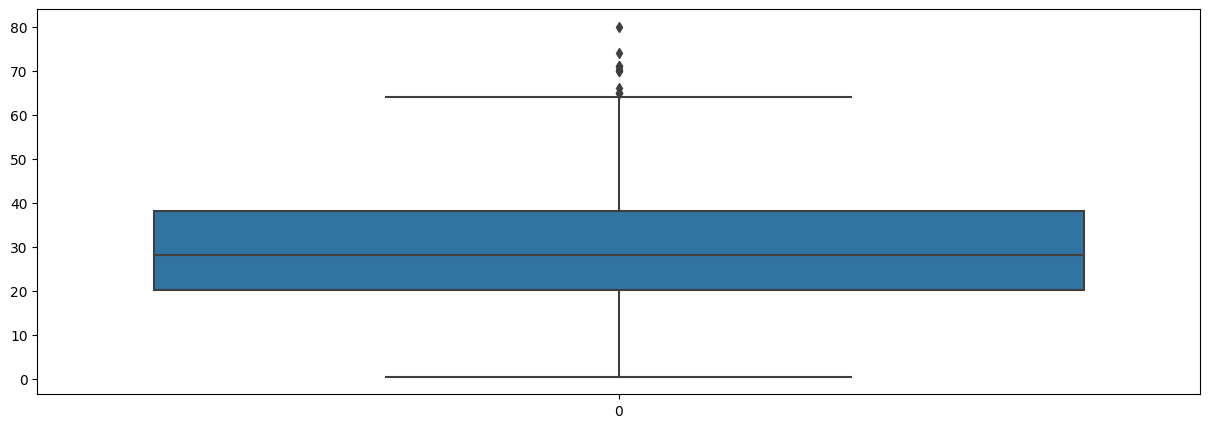

In [211]:
plt.figure(figsize=(15,5))
sns.boxplot(df.Age)

In [212]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [213]:
df.Age.fillna(df.Age.median(),inplace=True)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [215]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [216]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [217]:
# Drop off the columns = PassengerId,Name,Ticket
df.drop("PassengerId",axis=1,inplace=True)

In [218]:
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)


In [219]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C


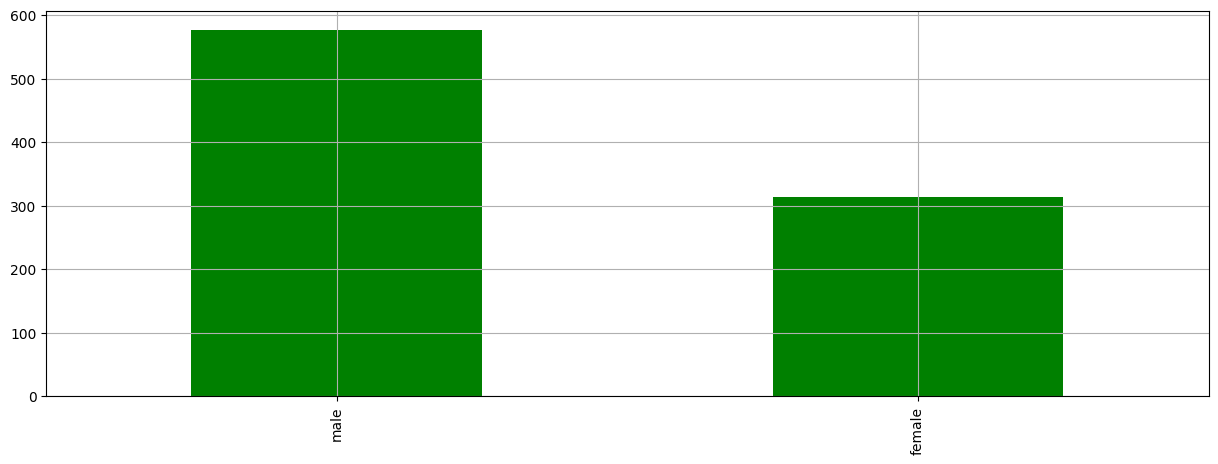

In [220]:
# strength of male and female
plt.figure(figsize=(15,5))
df.Sex.value_counts().plot.bar(df.Sex,color="green")
plt.grid()

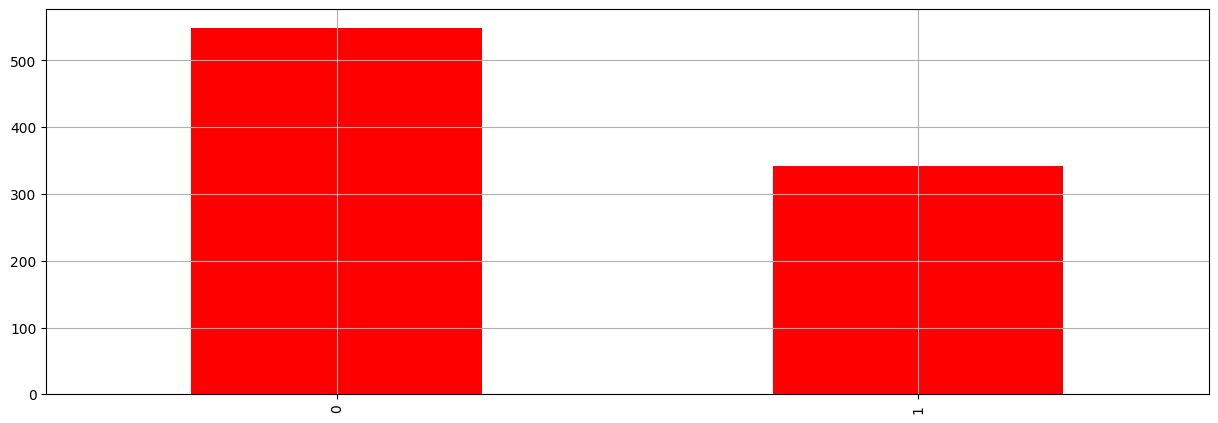

In [221]:
# Survived and Non-Servived peoples
plt.figure(figsize=(15,5))
df.Survived.value_counts().plot.bar(df.Survived,color="Red")
plt.grid()

<Axes: xlabel='Survived,Sex'>

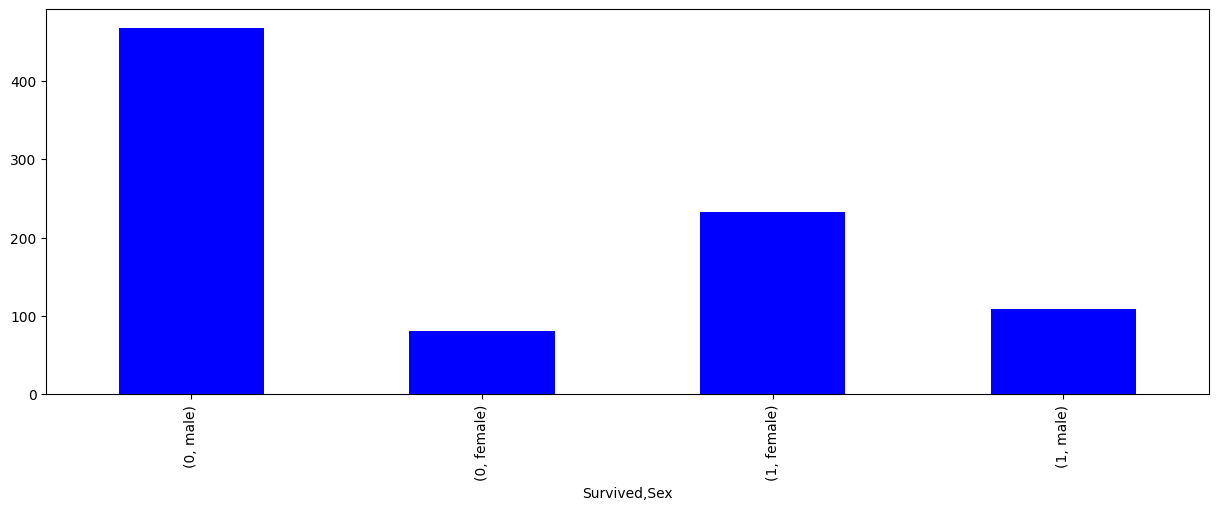

In [222]:
# survival and non-servivl peoples w.r.t sex
plt.figure(figsize=(15,5))
df.Sex.groupby(df.Survived).value_counts().plot.bar(df.Survived,color="blue")

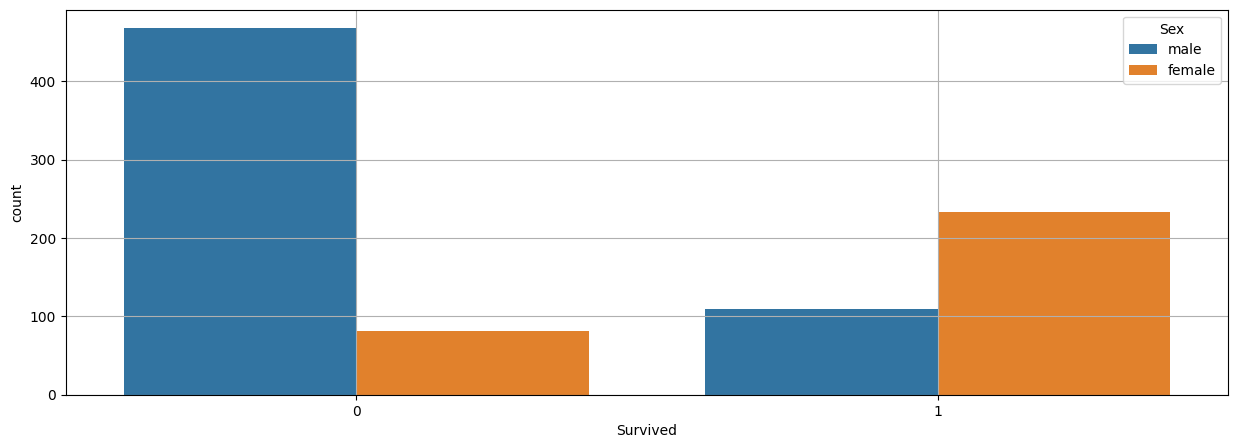

In [223]:
# survival and non-servivl peoples w.r.t sex
plt.figure(figsize=(15,5))
sns.countplot(x=df.Survived,data=df,hue=df.Sex)
plt.grid()

<Axes: >

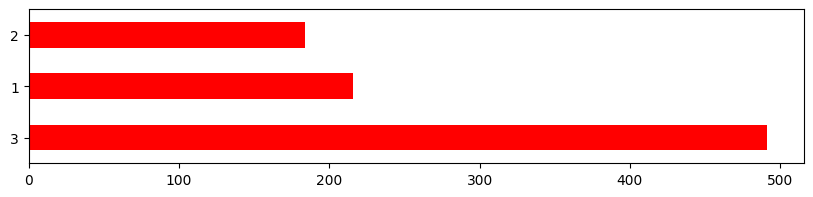

In [224]:
# strength of pclass 
plt.figure(figsize=(10,2))
df.Pclass.value_counts().plot.barh(df.Pclass,color='r')

<Axes: xlabel='Pclass', ylabel='count'>

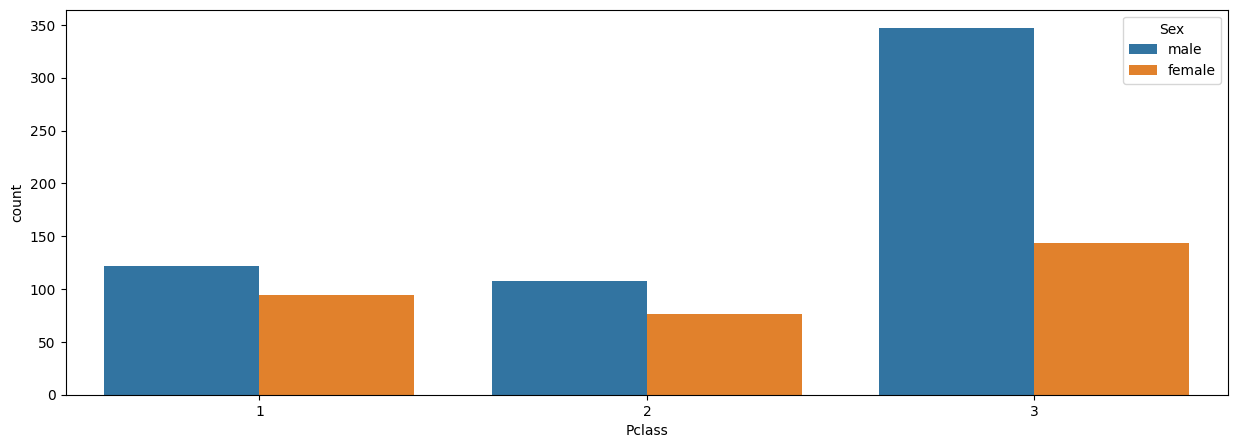

In [225]:
# survival and non-servivl peoples w.r.t Pclass 
plt.figure(figsize=(15,5))
sns.countplot(x=df.Pclass,data=df,hue=df.Sex)

In [226]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

# Encoding

In [227]:
from sklearn.preprocessing import LabelEncoder

In [228]:
le = LabelEncoder()

In [229]:
df.Sex = le.fit_transform(df.Sex)

In [230]:
df.head(4) # male =  1 & female = 0

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S


In [231]:
df.Age = df.Age.astype(int)

In [232]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,S
1,1,1,0,38,1,0,71.2833,C
2,1,3,0,26,0,0,7.9250,S
3,1,1,0,35,1,0,53.1000,S
4,0,3,1,35,0,0,8.0500,S


In [233]:
df.Fare = round(df.Fare,2)

In [234]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.25,S
1,1,1,0,38,1,0,71.28,C
2,1,3,0,26,0,0,7.92,S
3,1,1,0,35,1,0,53.10,S
4,0,3,1,35,0,0,8.05,S


In [236]:
new = df.copy()

In [239]:
pd.get_dummies(new.Embarked)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [240]:
df = pd.concat([df,pd.get_dummies(new.Embarked)],axis=1)

In [241]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22,1,0,7.25,S,0,0,1
1,1,1,0,38,1,0,71.28,C,1,0,0
2,1,3,0,26,0,0,7.92,S,0,0,1
3,1,1,0,35,1,0,53.10,S,0,0,1
4,0,3,1,35,0,0,8.05,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27,0,0,13.00,S,0,0,1
887,1,1,0,19,0,0,30.00,S,0,0,1
888,0,3,0,28,1,2,23.45,S,0,0,1
889,1,1,1,26,0,0,30.00,C,1,0,0


In [246]:
df.drop('Embarked',axis=1,inplace=True)

In [247]:
df.drop('C',axis=1,inplace=True)

In [249]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,1,22,1,0,7.25,0,1
1,1,1,0,38,1,0,71.28,0,0
2,1,3,0,26,0,0,7.92,0,1
3,1,1,0,35,1,0,53.10,0,1
4,0,3,1,35,0,0,8.05,0,1


In [250]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Q           0
S           0
dtype: int64

<Axes: >

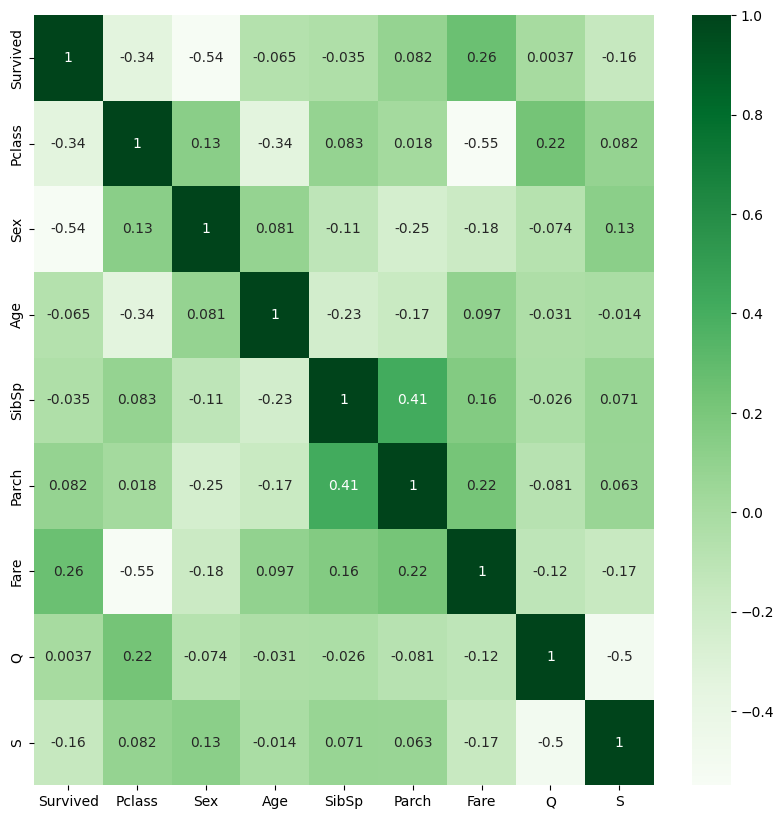

In [252]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

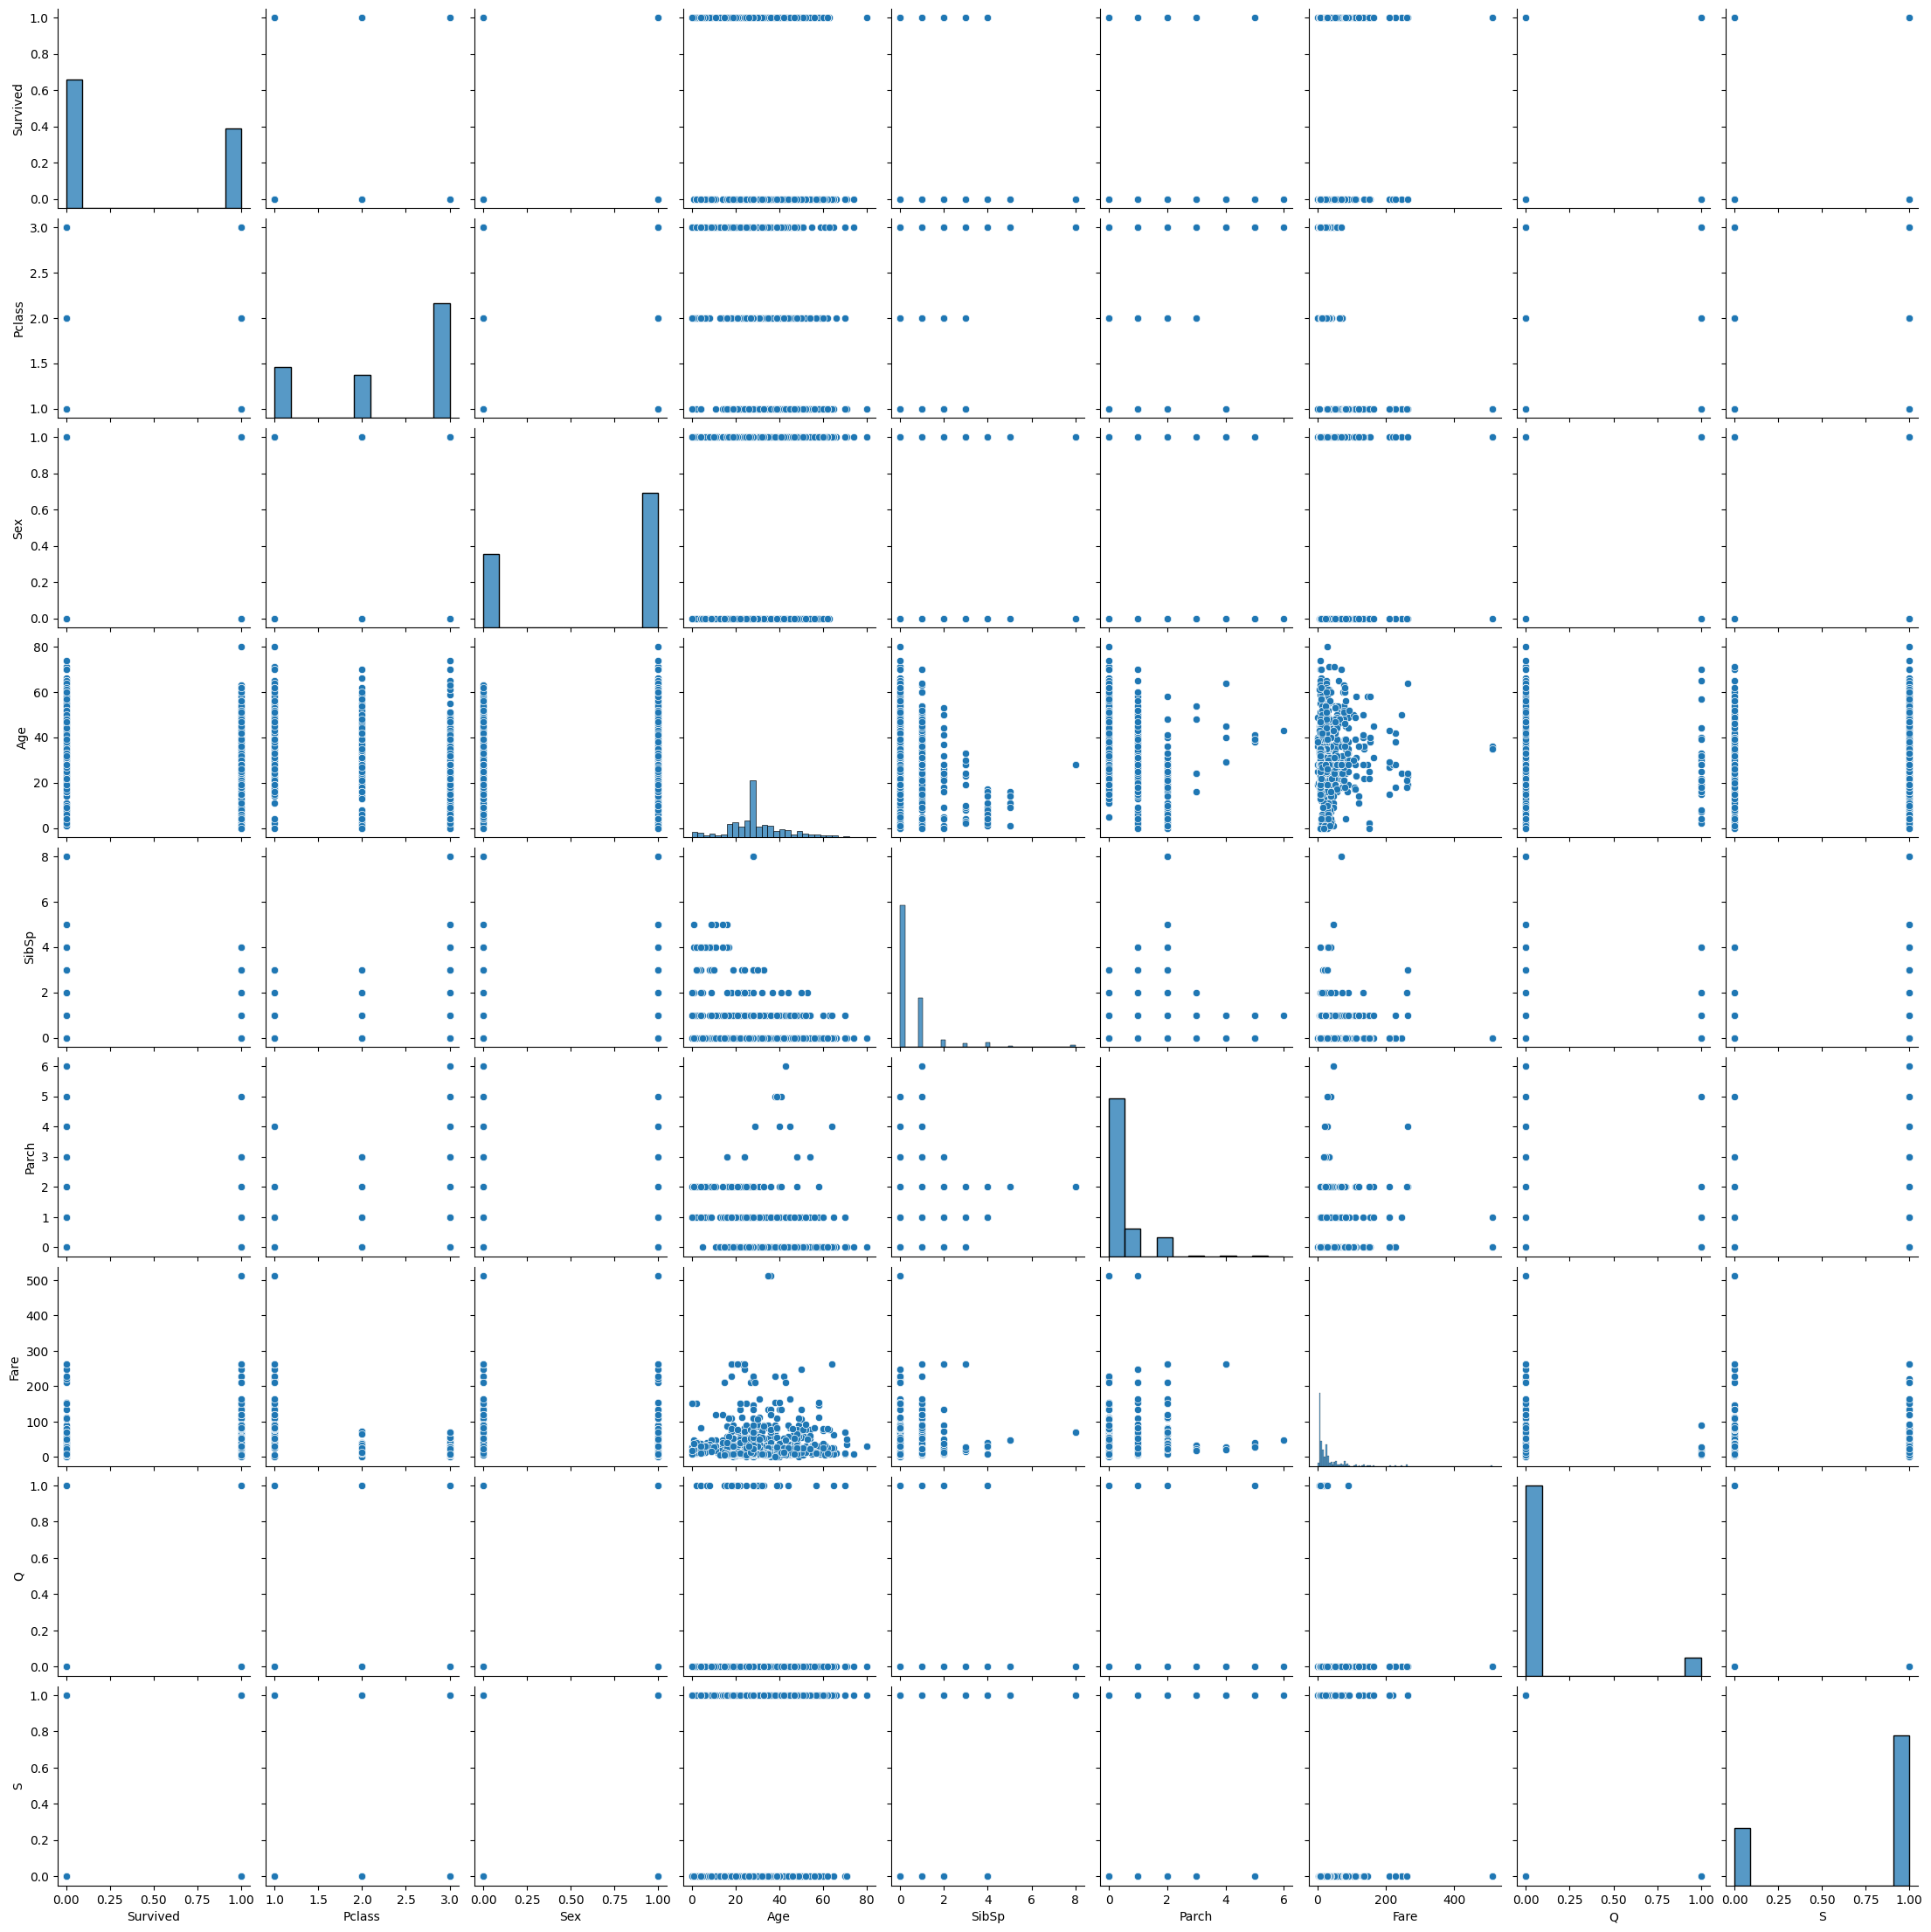

In [253]:
sns.pairplot(df)

In [254]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [256]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,22,1,0,7.25,0,1
1,1,0,38,1,0,71.28,0,0
2,3,0,26,0,0,7.92,0,1
3,1,0,35,1,0,53.10,0,1
4,3,1,35,0,0,8.05,0,1
...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,13.00,0,1
887,1,0,19,0,0,30.00,0,1
888,3,0,28,1,2,23.45,0,1
889,1,1,26,0,0,30.00,0,0


In [257]:
from sklearn.tree import ExtraTreeClassifier

In [258]:
feat  = ExtraTreeClassifier()

In [259]:
feat.fit(x,y)

ExtraTreeClassifier()

In [260]:
feat.feature_importances_

array([0.12476495, 0.28460561, 0.24622919, 0.0454049 , 0.05395524,
       0.21807181, 0.00756438, 0.01940393])

<Axes: >

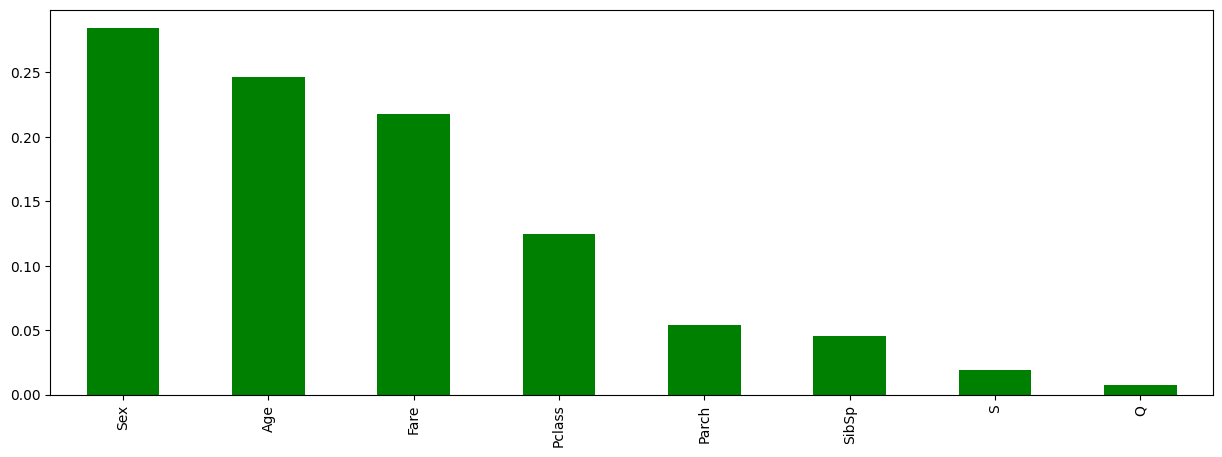

In [274]:
plt.figure(figsize=(15,5))
feat_imp = pd.Series(feat.feature_importances_,index=x.columns)
feat_imp.nlargest(8).plot.bar(color='g')

# Splitting the data

In [275]:
from sklearn.model_selection import train_test_split, KFold,StratifiedKFold

In [276]:
stk = StratifiedKFold(n_splits=10)

In [281]:
for train_index, test_index in stk.split(x,y):
    xtrain, xtest = x.iloc[train_index],x.iloc[test_index]
    ytrain,ytest = y.iloc[train_index],y.iloc[test_index]

In [287]:
ytrain

0      0
1      1
2      1
3      1
4      0
      ..
798    0
799    0
800    0
805    0
806    0
Name: Survived, Length: 802, dtype: int64

In [288]:
from sklearn.linear_model import LogisticRegression

In [289]:
classifier = LogisticRegression()

In [290]:
classifier.fit(xtrain,ytrain)

c:\Users\91939\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [291]:
ypredict = classifier.predict(xtest)

# EDA

In [292]:
finaldf = pd.DataFrame({
    "actuals":ytest,
    "pridctions":ypredict
})

<Axes: >

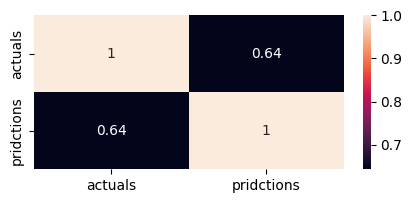

In [297]:
plt.figure(figsize=(5,2))
sns.heatmap(finaldf.corr(),annot=True)

In [298]:
confusion_matrix(ytest,ypredict)

array([[48,  6],
       [ 9, 26]], dtype=int64)

In [301]:
from sklearn.metrics import accuracy_score

In [302]:
accuracy_score(ytest,ypredict)

0.8314606741573034

In [299]:
from sklearn.metrics import classification_report

In [300]:
classification_report(ytest,ypredict)

'              precision    recall  f1-score   support\n\n           0       0.84      0.89      0.86        54\n           1       0.81      0.74      0.78        35\n\n    accuracy                           0.83        89\n   macro avg       0.83      0.82      0.82        89\nweighted avg       0.83      0.83      0.83        89\n'